# Prediction of wine type using Deep Learning
## Libraries and Loading Data

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

white = pd.read_csv("white.csv", sep=";")
red = pd.read_csv("red.csv", sep=";")

## Data Description

In [2]:
white.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000
mean,6.854788,0.278241,0.334192,6.391415,0.045772,35.308085,138.360657,0.994027,3.188267,0.489847,10.514267,5.877909
std,0.843868,0.100795,0.121020,5.072058,0.021848,17.007137,42.498065,0.002991,0.151001,0.114126,1.230621,0.885639
min,3.800000,0.080000,0.000000,0.600000,0.009000,2.000000,9.000000,0.987110,2.720000,0.220000,8.000000,3.000000
25%,6.300000,0.210000,0.270000,1.700000,0.036000,23.000000,108.000000,0.991723,3.090000,0.410000,9.500000,5.000000
50%,6.800000,0.260000,0.320000,5.200000,0.043000,34.000000,134.000000,0.993740,3.180000,0.470000,10.400000,6.000000
75%,7.300000,0.320000,0.390000,9.900000,0.050000,46.000000,167.000000,0.996100,3.280000,0.550000,11.400000,6.000000
max,14.200000,1.100000,1.660000,65.800000,0.346000,289.000000,440.000000,1.038980,3.820000,1.080000,14.200000,9.000000


In [3]:
red.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


## Distribution of the information

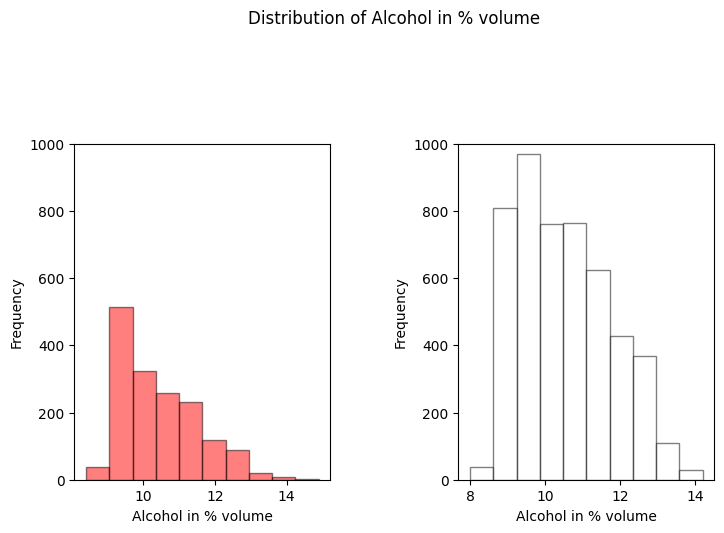

In [4]:
fig, ax = plt.subplots(1,2)
ax[0].hist(red.alcohol, 10, facecolor = "red", ec = "black", alpha = 0.5, label = "Red Wine")
ax[1].hist(white.alcohol, 10, facecolor = "white", ec = "black", alpha = 0.5, label = "White Wine")

fig.subplots_adjust(left = 0, right = 1, bottom = 0, top = 0.7, hspace = 0.3, wspace = 0.5)

ax[0].set_ylim([0,1000])
ax[0].set_xlabel("Alcohol in % volume")
ax[0].set_ylabel("Frequency")
ax[1].set_ylim([0,1000])
ax[1].set_xlabel("Alcohol in % volume")
ax[1].set_ylabel("Frequency")

fig.suptitle("Distribution of Alcohol in % volume")
plt.show()

## Data split for training and testing

In [5]:
red['type'] = 1
white['type'] = 0
wines = pd.concat([red,white], ignore_index = True)

from sklearn.model_selection import train_test_split
X = wines.iloc[:, 0:11]
y = np.ravel(wines.type)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.4, random_state = 41)

## Network Structure

In [12]:
from keras.models import Sequential
from keras.layers import Dense

model = Sequential()
model.add(Dense(12, activation = 'relu', input_shape = (11,)))
model.add(Dense(8, activation = 'relu'))
model.add(Dense(1, activation = 'sigmoid'))

model.output_shape
model.summary()
model.get_config()
model.get_weights()
model.compile(loss = 'binary_crossentropy', optimizer= 'adam', metrics=['accuracy'])

Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_12 (Dense)                │ (None, 12)             │           144 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_13 (Dense)                │ (None, 8)              │           104 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_14 (Dense)                │ (None, 1)              │             9 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 257 (1.00 KB)

 Trainable params: 257 (1.00 KB)

 Non-trainable params: 0 (0.00 B)

## Training and Prediction

In [13]:
model.fit(X_train, y_train, epochs= 3, batch_size= 1, verbose= 1)
y_pred = model.predict(X_test)
print(y_pred)

Epoch 1/3
3898/3898 ━━━━━━━━━━━━━━━━━━━━ 6s 1ms/step - accuracy: 0.9051 - loss: 0.2818
Epoch 2/3
3898/3898 ━━━━━━━━━━━━━━━━━━━━ 5s 1ms/step - accuracy: 0.9451 - loss: 0.1593
Epoch 3/3
3898/3898 ━━━━━━━━━━━━━━━━━━━━ 6s 1ms/step - accuracy: 0.9485 - loss: 0.1446
82/82 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
[[1.10625036e-01]
 [9.97144759e-01]
 [7.61440024e-05]
 ...
 [4.24063066e-03]
 [1.68713406e-02]
 [1.39892998e-03]]
